## Bestfer Solution MVP

**Features**
1. Total Units Sold x Months Graph
2. Total Sales x Months Graph
3. feature 3

## Importing Libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

## The data at a glance

**Read .csv file from folder (BFH-LEDE)**

In [12]:
data = pd.read_csv('./data/data.csv')

**Display .csv file as table**

In [13]:
data.head()

,Unnamed: 0,Codigo,Descrição - 31/07/2022,UM,Import?,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Total,Saldo,Freq.,Media,Tempo,FOB,Venda,Ativo,Entrada Prevista
0,1.0,'BFH0003,BF PISTOLA DE COLA 6W,PC,Sim,1781.0,2608.0,2069,2226,1362,1889,11935.0,30150.0,6.0,1989.1670,15.15710,0.01,15.30,S,0.0
1,2.0,'BFH0014,BF JG CHAVE HEX GRANDE C/PONTA BOLA 9PCS ACZ,PC,Sim,121.0,217.0,177,100,115,49,779.0,1641.0,6.0,129.8333,12.63928,0.01,38.30,S,3600.0
2,3.0,'BFH0015,BF JG CH COM BITS 28PCS,PC,Sim,97.0,258.0,150,299,81,199,1084.0,910.0,6.0,180.6667,5.03690,0.01,30.49,S,2400.0
3,4.0,'BFH0016,BF JG CHAVE TORX GRANDE 9PCS AC,PC,Sim,129.0,268.0,138,226,240,153,1154.0,3996.0,6.0,192.3333,20.77643,0.01,38.30,S,0.0
4,5.0,'BFH0020,BF LAMINA P/ARCO DE SERRA 12PCS 24T,PC,Sim,2182.0,3569.0,4371,2663,2037,2623,17445.0,35914.0,6.0,2907.5000,12.35219,0.01,12.60,S,20016.0


In [24]:
data.describe().head()

,Unnamed: 0,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Total,Saldo,Freq.,Media,Tempo,FOB,Venda,Entrada Prevista
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,846.500000,462.918972,660.487541,616.841608,546.589835,496.072695,549.067376,3331.978026,11951.486407,5.495272,566.880194,59.243418,0.014711,26.445520,2910.747636
std,488.582644,1263.298498,1580.228740,1702.023076,1965.728207,2046.244109,1580.505972,9243.314303,24658.306057,1.382702,1566.443482,90.708251,0.047818,40.393856,12093.642252
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002830,0.010000,0.010000,0.000000
25%,423.750000,27.000000,40.000000,30.750000,28.000000,28.000000,39.750000,287.750000,2689.250000,6.000000,50.400000,14.060998,0.010000,7.500000,0.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 0 to 1691
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1692 non-null   float64
 1   Codigo                              1692 non-null   object 
 2   Descrição       -       31/07/2022  1692 non-null   object 
 3   UM                                  1692 non-null   object 
 4   Import?                             1692 non-null   object 
 5   Feb-22                              1692 non-null   float64
 6   Mar-22                              1692 non-null   float64
 7   Apr-22                              1692 non-null   int64  
 8   May-22                              1692 non-null   int64  
 9   Jun-22                              1692 non-null   int64  
 10  Jul-22                              1692 non-null   int64  
 11  Total                               1692 no

In [15]:
data.isna().sum()

Unnamed: 0                            1
Codigo                                1
Descrição       -       31/07/2022    1
UM                                    1
Import?                               1
Feb-22                                0
Mar-22                                0
Apr-22                                0
May-22                                0
Jun-22                                0
Jul-22                                0
Total                                 0
Saldo                                 1
Freq.                                 1
Media                                 1
Tempo                                 1
FOB                                   1
Venda                                 1
Ativo                                 1
Entrada Prevista                      1
dtype: int64

In [17]:
data.size

33860

**Dimensions of data**

In [20]:
data.shape

(1693, 20)

## Handling Missing Data

**Remove `null` values from data**

In [21]:
data = data.dropna()

Remove `null` values

In [22]:
data.isna().sum()

Unnamed: 0                            0
Codigo                                0
Descrição       -       31/07/2022    0
UM                                    0
Import?                               0
Feb-22                                0
Mar-22                                0
Apr-22                                0
May-22                                0
Jun-22                                0
Jul-22                                0
Total                                 0
Saldo                                 0
Freq.                                 0
Media                                 0
Tempo                                 0
FOB                                   0
Venda                                 0
Ativo                                 0
Entrada Prevista                      0
dtype: int64

All `null` values have been removed

## Cleaning Data

**Check if there are any `inactive` items**

In [29]:
data['Ativo'].unique()f

array(['S', 'N'], dtype=object)

**Remove`inactive` items (Ativo = N)**

In [30]:
data = data[data['Ativo'].str.contains('N') == False]

In [31]:
data['Ativo'].unique()

array(['S'], dtype=object)

Successfully removed the `inactive` items from the data

## Data Wrangling

### Total Units Sold x Months

**Store column name into a `list`**

In [58]:
column_name = list(data.columns)

**Create `dictionary` to store total sum of sales and their respective months**

In [105]:
total_units = [data[column_name[5]].sum(),data[column_name[6]].sum(),data[column_name[7]].sum(),data[column_name[8]].sum(),data[column_name[9]].sum(),data[column_name[10]].sum()]
months = [column_name[5],column_name[6],column_name[7],column_name[8],column_name[9],column_name[10]]
index = ['Total Units']
units_data = {'Total Units Sold' : total_units, 'Months' : months}

**Create graph to plot `total_units` against `months`**

In [122]:
units_df = pd.DataFrame(units_data)
units_df.head()

,Total Units Sold,Months
0,774161.90,Feb-22
1,1096649.92,Mar-22
2,1012810.00,Apr-22
3,915310.00,May-22
4,827942.00,Jun-22


<AxesSubplot:xlabel='Months'>

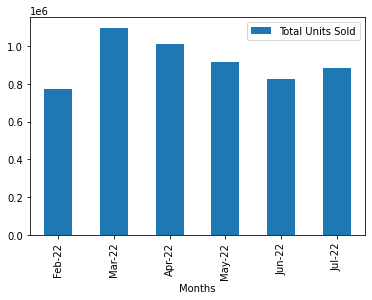

In [123]:
units_df.plot(x = 'Months', y = 'Total Units Sold', kind='bar')

### Total Sales x Months

**Calculate `mean` price of all proudcts**

In [132]:
avg_price = data['Venda'].mean()
avg_price

26.49056

**Multiply the `avg_price` by the entire column `Total Units Sold`**

In [133]:
sales_df = units_df

In [134]:
sales_df["Total Units Sold"] = avg_price * sales_df["Total Units Sold"]

**Create graph to plot `total_sales` against `months`**

In [135]:
sales_df.head()

,Total Units Sold,Months
0,5.432679e+08,Feb-22
1,7.695738e+08,Mar-22
2,7.107392e+08,Apr-22
3,6.423186e+08,May-22
4,5.810081e+08,Jun-22


In [136]:
sales_df = sales_df.rename(columns = {'Total Units Sold' : 'Total Sales'})

<AxesSubplot:xlabel='Months'>

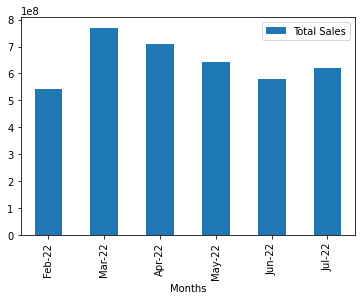

In [137]:
sales_df.plot(x = 'Months', y = 'Total Sales', kind='bar')